# 2 Statistics and Model

✅ Previus concluded: preprocess of train dataset, used this here on this notebook

🎯 The goal of this Notebook it is to check a Baseline Model, confirm statistics and create a first model

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_validate, learning_curve, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint

In [2]:
#url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_preprocessed - 20.08.2024-21h48m.csv'
#url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_cirone-preprocessed.csv'
#url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_preprocessed_23082024.csv'
url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_preprocessed_20240825.csv'

#This is the TRAIN dataset preprocessed. Despite of that we will use train, test split in the TRAIN dataset,
#just for academic purpuses.

In [3]:
df = pd.read_csv(url)
df.head(5)

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.722222,-1.111111,-0.329127,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.666667,-0.888889,0.196635,-0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [4]:
data = df.copy()
data.shape

(100000, 47)

In [5]:
data.shape

(100000, 47)

In [6]:
data.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'sin_Month', 'cos_Month', 'Credit_History_Age_Months',
       'Customer_ID_infrequent_sklearn', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',

In [7]:
pd.set_option('display.max_columns', None)
#configurating pandas so can show to me all the columns

In [8]:
data.head(3)

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,-0.258118,-0.649349,-0.142087,-0.310616,-0.121910,0.000000,1.378396,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,-0.258118,-0.042731,-0.142087,-0.078987,-0.261045,0.369340,1.009056,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,-0.258118,-0.437753,-0.142087,-0.302760,-0.028459,0.504528,0.504528,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [9]:
data["Num_Bank_Accounts"].describe()

count    100000.000000
mean          0.092237
std           0.648396
min          -1.250000
25%          -0.500000
50%           0.000000
75%           0.500000
max           3.250000
Name: Num_Bank_Accounts, dtype: float64

In [10]:
data["Credit_Score"].unique()

array([0, 2, 1])

#### Just a quick reminder: 
#### Good = 0
#### Standard = 2
#### Poor = 1

#### 2.0 Defining the X and y in TRAIN Database to start

In [11]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]

In [12]:
X.shape

(100000, 46)

#### 2.1 Holdout method before testing any model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.2 Avaluate the model 1: Logistic Regression (before feature selection or any tunnig)

In [14]:
#Apenas chegando o warning do modelo de regressão logistica sem max iter
model_log_v0 = LogisticRegression()
model_log_v0.fit(X_train, y_train)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#model_log = LogisticRegression(max_iter=10000)
#model_log = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42, max_iter=10000)
model_log = LogisticRegression(multi_class='ovr', max_iter=10000)
#not editing parameters because we want to know this baseline model to compare with other models,
#and with that we will tune the best one.

model_log.fit(X_train, y_train)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='ovr')

#### 2.3 Cross Validation (Logistic) before feature selection

In [16]:
cv_results = cross_validate(model_log, X_train, y_train, cv=5)

acc_baseline = float(cv_results["test_score"].mean())

print(acc_baseline)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid th

0.6597857142857143


In [17]:
print(acc_baseline)

0.6597857142857143


#### 2.4 Learning Curve

In [18]:
# train_sizes = np.linspace(1000, 80000, 500, dtype=int)
# train_sizes, train_scores, test_scores = learning_curve(model_log, X, y, train_sizes=train_sizes, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# tests_scores_mean = np.mean(test_scores, axis=1)

In [19]:
# plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

# plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

# plt.title('Learning Curve')
# plt.xlabel('Data Size')
# plt.ylabel('Model accuracy')
# plt.legend()
# plt.show()

#### Despite of Accurancy not that good (0.62) the model it is not overfitting, and even not underfitting.
#### Enhance preprocess?
https://codingnomads.com/validation-learning-curve-overfitting-and-underfitting


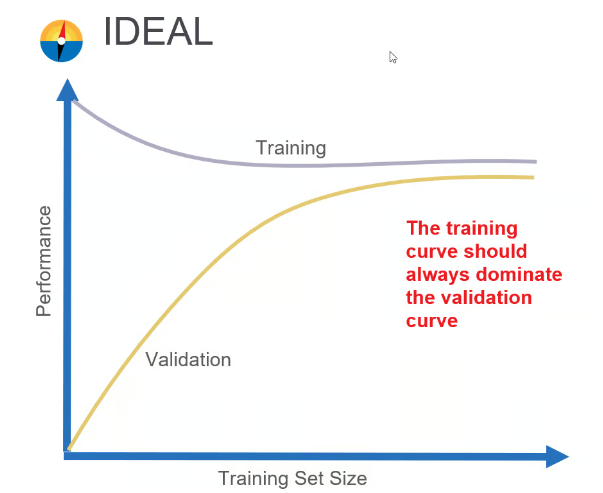

#### 2.5 Correlation (Numerical Features)

<Axes: >

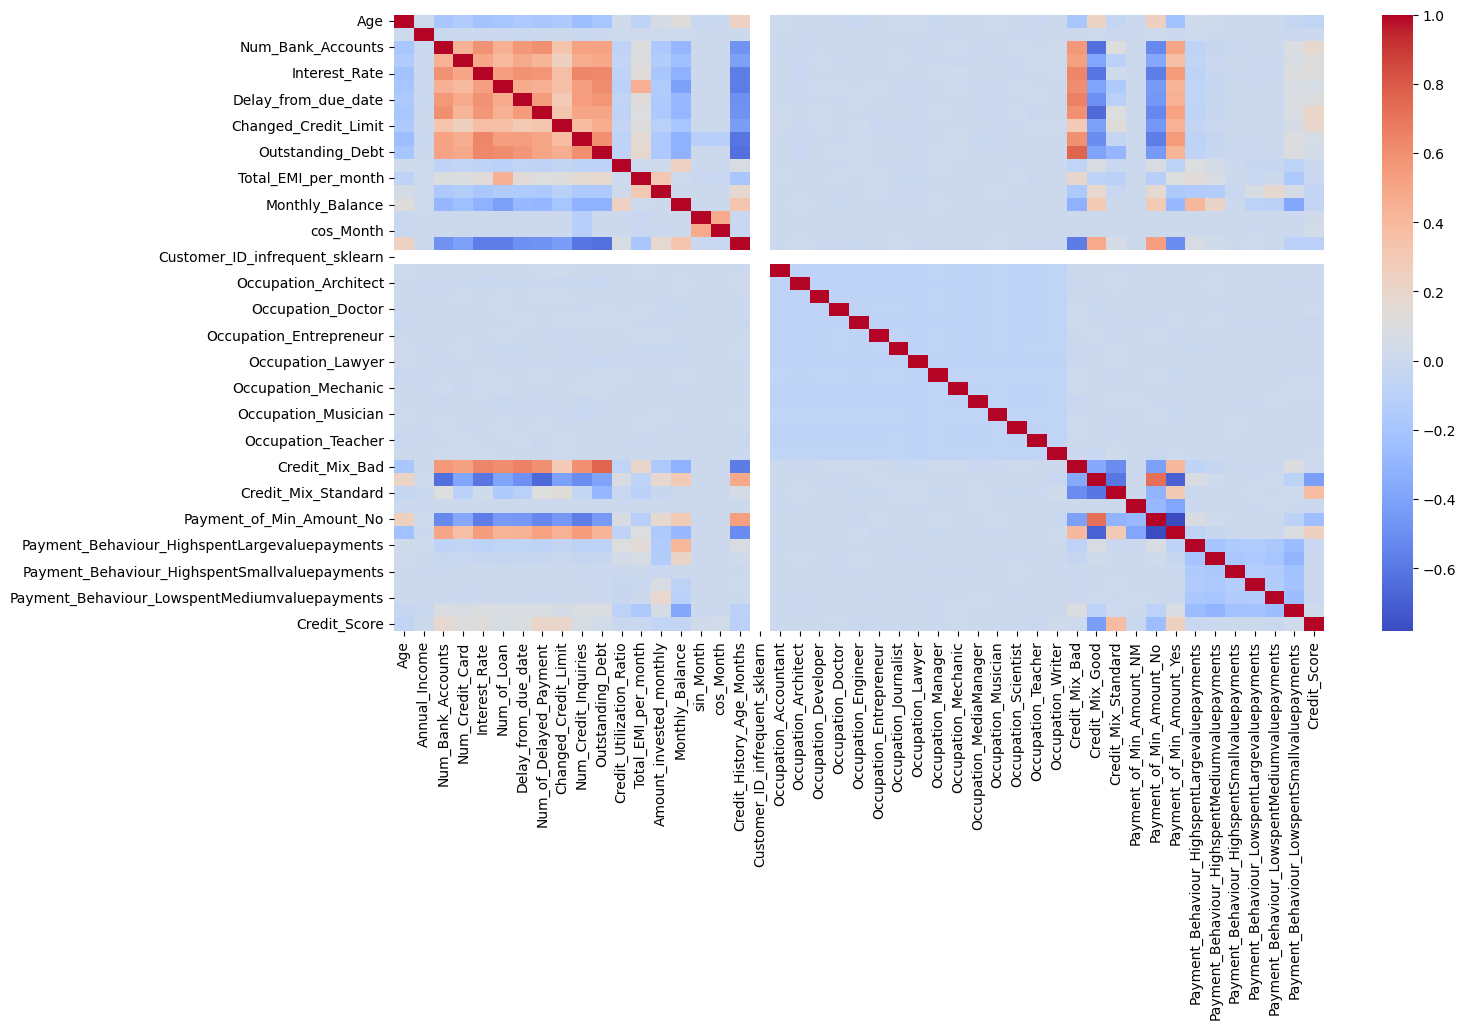

In [20]:
corr_matrix = data.corr()
column_names = corr_matrix.columns

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot = False, annot_kws={"size": 12}, fmt=".2f")
#sns.heatmap(corr_matrix, cmap='coolwarm', annot = True, annot_kws={"size": 12}, fmt=".2f")

#### There are only a few features highly correlated

#### 👇Deeping into the correlation

In [21]:
# Convert the correlation matrix into a DataFrame
corr_df = corr_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]


In [22]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Show the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(20)
#corr_df.sort_values(by="absolute_correlation", ascending=False)

,feature_1,feature_2,correlation,absolute_correlation
1785,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,-0.780071,0.780071
1740,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,-0.780071,0.780071
493,Outstanding_Debt,Credit_Mix_Bad,0.760932,0.760932
1528,Credit_Mix_Bad,Outstanding_Debt,0.760932,0.760932
1736,Payment_of_Min_Amount_No,Credit_Mix_Good,0.720993,0.720993
1601,Credit_Mix_Good,Payment_of_Min_Amount_No,0.720993,0.720993
1602,Credit_Mix_Good,Payment_of_Min_Amount_Yes,-0.692127,0.692127
1782,Payment_of_Min_Amount_Yes,Credit_Mix_Good,-0.692127,0.692127
1571,Credit_Mix_Good,Num_of_Delayed_Payment,-0.658858,0.658858
356,Num_of_Delayed_Payment,Credit_Mix_Good,-0.658858,0.658858


#### Feature Permutation

In [23]:
# Perform the permutation
permutation_score = permutation_importance(model_log, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)

importance_df.columns=['feature','score importance']


# Show the important features
importance_df.sort_values(by="score importance", ascending = False)

,feature,score importance
35,Credit_Mix_Good,0.054097
4,Interest_Rate,0.045181
36,Credit_Mix_Standard,0.026361
9,Num_Credit_Inquiries,0.024179
3,Num_Credit_Card,0.022801
6,Delay_from_due_date,0.018919
34,Credit_Mix_Bad,0.016334
8,Changed_Credit_Limit,0.011853
38,Payment_of_Min_Amount_No,0.008404
17,Credit_History_Age_Months,0.00405


#### Modeling after Score Permutation

In [24]:
# Drops weak features

#columns_to_drop = ["Delay_from_due_date", "Credit_Mix_Good", "Credit_Mix_Standard", "Outstanding_Debt", "Changed_Credit_Limit", "Payment_of_Min_Amount_Yes", "Credit_History_Age_Months", "Credit_Mix_Bad", "Payment_of_Min_Amount_No", "Payment_Behaviour_LowspentSmallvaluepayments"]

#columns_to_drop = ["Delay_from_due_date", "Credit_Mix_Good", "Credit_Mix_Standard", "Outstanding_Debt"]

#columns_to_drop = ["Delay_from_due_date"]

#columns_to_drop = ["Month"]

#columns_to_drop = ["Month", "Occupation_Manager"]

#columns_to_drop = ["Occupation_Manager", "Occupation_Developer", "Occupation_Scientist"]

'''
columns_to_drop = ["Occupation_MediaManager",
                   "Interest_Rate",
                   "Occupation_Journalist",
                   "Num_Credit_Card",
                   "Num_Bank_Accounts",
                   "Occupation_Engineer",
                   "Occupation_Manager",
                   "Occupation_Scientist",
                   "Occupation_Lawyer",
                   "Occupation_Entrepreneur",
                   "Occupation_Musician",
                   "Occupation_Architect",
                   "sin_Month",
                   "cos_Month"
                   ]
'''
columns_to_drop = ["Occupation_Writer", "Occupation_Journalist", "Occupation_Teacher", "Occupation_Musician", "Payment_of_Min_Amount_NM", "cos_Month"]

X_less_features = X_train.drop(columns=columns_to_drop)

In [25]:
model_log_2 = LogisticRegression(max_iter=10000)
model_log_2.fit(X_less_features, y_train)

LogisticRegression(max_iter=10000)

In [26]:
cv_results_2 = cross_validate(model_log_2, X_less_features, y_train, cv=5)

acc = float(cv_results_2["test_score"].mean())

print(acc)

0.6629571428571428


## Testing others Models to check if the accurancy gets higher

#### despite of having tested the Logistic Regression model with some editing in the model, we have to understand if the model performs better with others models. 

#### We will use the better model in a "no tunnig" fitting and then tune this specific model

#### Decision Tree:

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_dec_tree = DecisionTreeClassifier()

model_dec_tree.fit(X_train, y_train)

cv_results = cross_validate(model_dec_tree, X_train, y_train)

acc_decision_tree = float(cv_results["test_score"].mean())

acc_decision_tree

0.705957142857143

#### Random Forest:

In [54]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier()

model_random.fit(X_train, y_train)

cv_results = cross_validate(model_random, X_train, y_train)

acc_random = float(cv_results["test_score"].mean())

acc_random


0.7898571428571428

#### Permutation no Random Forest

In [29]:
# Perform the permutation
permutation_score = permutation_importance(model_random, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train.columns, permutation_score.importances_mean)).T)

importance_df.columns=['feature','score importance']


# Show the important features
importance_df.sort_values(by="score importance", ascending = False)

KeyboardInterrupt: 

#### Learning Curve no Forest

In [ ]:
# train_sizes = np.linspace(1000, 40000, 10, dtype=int)
# train_sizes, train_scores, test_scores = learning_curve(model_random, X_train, y_train, train_sizes=train_sizes, cv=3, n_jobs=-1)

# train_scores_mean = np.mean(train_scores, axis=1)
# tests_scores_mean = np.mean(test_scores, axis=1)

: 

In [ ]:
# plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

# plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

# plt.title('Learning Curve')
# plt.xlabel('Data Size')
# plt.ylabel('Model accuracy')
# plt.legend()
# plt.show()

#### CatBoost?

In [ ]:
#Greg rodou CAT BOOST (0.746), ainda menor do que decision tree

In [ ]:
# pip install catboost

In [ ]:
# pip show catboost

In [ ]:
# from catboost import CatBoostClassifier

#### XGBoost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

model_xgb.fit(X_train, y_train)

cv_results = cross_validate(model_xgb, X_train, y_train)

acc_xgb = float(cv_results["test_score"].mean())

acc_xgb

0.7609857142857143

#### Permutation no XGB

In [56]:
# Perform the permutation
permutation_score = permutation_importance(model_xgb, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train.columns, permutation_score.importances_mean)).T)

importance_df.columns=['feature','score importance']


# Show the important features
importance_df.sort_values(by="score importance", ascending = False)

,feature,score importance
10,Outstanding_Debt,0.101443
4,Interest_Rate,0.09981
6,Delay_from_due_date,0.078094
35,Credit_Mix_Good,0.071303
8,Changed_Credit_Limit,0.055714
17,Credit_History_Age_Months,0.047814
36,Credit_Mix_Standard,0.047076
3,Num_Credit_Card,0.04367
1,Annual_Income,0.04322
12,Total_EMI_per_month,0.038881


#### Learning curve no XGB

In [57]:
train_sizes = np.linspace(1000, 40000, 10, dtype=int)
train_sizes, train_scores, test_scores = learning_curve(model_xgb, X_train, y_train, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
tests_scores_mean = np.mean(test_scores, axis=1)

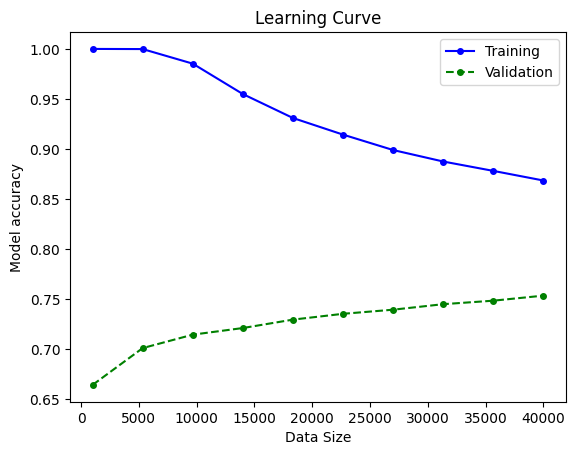

In [58]:
plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

plt.title('Learning Curve')
plt.xlabel('Data Size')
plt.ylabel('Model accuracy')
plt.legend()
plt.show()

#### Tunning XG Boost

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import time
import scipy.stats as stats

In [22]:
#Instaciatei the model acima

#Hyperparameter Grid
# grid = {
#     'max_depth': [3,5,7,10],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators':stats.randint(50, 200),
#     'subsample': [0.5, 0.7, 1]
#     }

# grid_2 ={
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.5, 0.7, 1.0],
#     'colsample_bytree': [0.3, 0.5, 0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5, 1, 2],
#     'min_child_weight': [1, 3, 5, 7],
#     'reg_alpha': [0, 0.01, 0.1, 1, 10],
#     'reg_lambda': [0, 0.01, 0.1, 1, 10]
#      }

grid_3 ={
    'max_depth': [8, 10, 12, 14, 15],
    'learning_rate': [0.04, 0.05, 0.06, 0.08, 0.09],
    'n_estimators': [300, 350, 400],
    'subsample': [0.9, 1.0, 1.1, 1.2, 1.5],
    'colsample_bytree': [0.68, 0.70, 0.71, 0.72, 0.75],
    'gamma': [0.08, 0.1, 0.12],
    'min_child_weight': [0.5, 0.8, 1, 1.2, 1.3],
    'reg_alpha': [0.008, 0.01, 0.009],
    'reg_lambda': [0, 0.001]
     }

# grid_3 ={
#     'max_depth': [15, 16, 17, 18, 19, 30],
#     'learning_rate': [0.075, 0.080, 0.085],
#     'n_estimators': [325, 330, 350, 375],
#     'subsample': [0.89, 0.90, 0.91],
#     'colsample_bytree': [0.699, 0.700, 0.701],
#     'gamma': [0.11, 0.12, 0.13, 0.14, 0.15],
#     'min_child_weight': [0.78, 0.79, 0.80, 0.81, 0.82, 0.83],
#     'reg_alpha': [0.007, 0.008, 0.009],
#     'reg_lambda': [0, 0.0005, 0.001, 0.0015]
#      }


#Instantiate the Grid
search = RandomizedSearchCV(
    model_xgb,
    grid_3,
    scoring="accuracy",
    n_iter=20,
    random_state=42,
    cv=5,
    n_jobs=-1
    )

# Start timing
start_time = time.time()

# Fit data to Grid Search
search.fit(X_train, y_train)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Printing
print(f"Best Estimator: {search.best_estimator_}")
print(f"Best Score: {search.best_score_:.4f}")
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/model_selection/_validation.py"

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.12, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)
Best Score: 0.8064
Best Parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.009, 'n_estimators': 300, 'min_child_weight': 0.5, 'max_depth': 15, 'learning_rate': 0.08, 'gamma': 0.12, 'colsample_bytree': 0.7}
Elapsed Time: 413.3

In [ ]:
'''
Best Parameters: {  'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.01,
                    'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10,
                    'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


Best Parameters: {'subsample': 0.9,
                    'reg_lambda': 0.001,
                    'reg_alpha': 0.008,
                    'n_estimators': 350,
                    'min_child_weight': 0.8,
                    'max_depth': 15,
                    'learning_rate': 0.08,
                    'gamma': 0.12,
                    'colsample_bytree': 0.7}



'''

In [23]:
print(f"Best Score: {search.best_score_:.4f}")

Best Score: 0.8064


In [24]:
#Salvar o modelo para subir em outro notebook
import pickle
file_name = "fermodel_xgb-tuned-20240825 v3.sav"
pickle.dump(search, open(file_name, "wb"))
loaded_model = pickle.load(open(file_name, "rb"))
loaded_model

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.68, 0.7, 0.71,
                                                             0.72, 0.75],
                                        'gamma': [0.08, 0.1, 0.12],
                                        'learning_rate': [0.04, 0.05, 0.06,
                                                          0.08, 0.09],
                                        'max_depth': [8, 10, 12, 14, 15],
                                        'min_child_weight': [0.5, 0.8, 1, 1.2,
                                                             1.3],
                                        'n_estimators': [300, 350, 400],
                                        'reg_alpha': [0.008, 0.01, 0.009],
                                        'reg_lambda': [0, 0.001],
                                        'subsample': [0.9, 1.0, 1.1, 1.2, 1.5]},
                   random_state=42, scoring='accuracy')

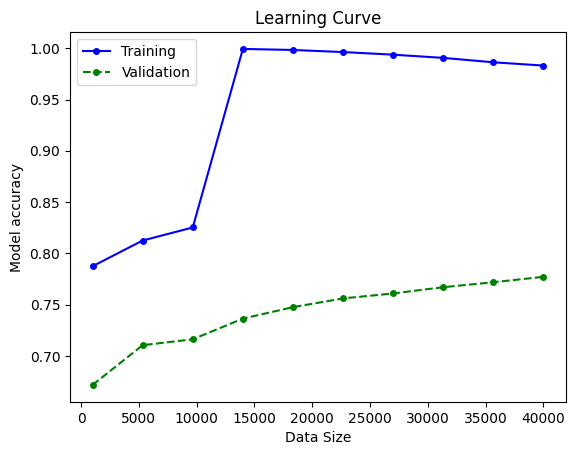

In [42]:
train_sizes = np.linspace(1000, 40000, 10, dtype=int)
train_sizes, train_scores, test_scores = learning_curve(search, X_train, y_train, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
tests_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

plt.title('Learning Curve')
plt.xlabel('Data Size')
plt.ylabel('Model accuracy')
plt.legend()
plt.show()

In [ ]:
#XG Boost sem tunning: 0.75
#XG Boost com tunning v1: 0.77
#XG Boost com tunning v2: 0.78
#XG Boost com tunning v3: 0.79

#### Naive Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()

model_naive.fit(X_train, y_train)

cv_results = cross_validate(model_naive, X_train, y_train)

acc_naive = float(cv_results["test_score"].mean())

acc_naive

0.6227

#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Fazer aqui linnear e polinomial

#### ADABOOST Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier()

model_ada.fit(X_train, y_train)

cv_results = cross_validate(model_ada, X_train, y_train)

acc_ada = float(cv_results["test_score"].mean())

acc_ada

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/ensemble/_weight_boostin

0.6528857142857143

In [43]:
print(f"The best model it's Random Forest {acc_random}")

print(f"Acc of Logistic: {acc_baseline}")
print(f"Acc of Random Forest: {acc_random}")
print(f"Acc of Decision Tree: {acc_decision_tree}")
print(f"Acc of XGB: {acc_xgb}")
print(f"Acc of Naive: {acc_naive}")
print(f"Acc of Naive: {acc_ada}")

The best model it's Random Forest 0.7909714285714285
Acc of Logistic: 0.6596571428571429
Acc of Random Forest: 0.7909714285714285
Acc of Decision Tree: 0.7067428571428571
Acc of XGB: 0.7621428571428572


NameError: name 'acc_naive' is not defined

In [ ]:
# #model_svm = SVC(kernel='linear', decision_function_shape='ovr')
# model_svm = SVC(decision_function_shape='ovr')

# model_svm.fit(X_train, y_train)

# cv_results = cross_validate(model_svm, X_train, y_train)

# acc_svm = float(cv_results["test_score"].mean())

# acc_svm

In [ ]:
# Salvar o modelo para subir em outro notebook
# import pickle
# file_name = "model_random.sav"
# pickle.dump(model_random, open(file_name, "wb"))
# loaded_model = pickle.load(open(file_name, "rb"))
# loaded_model

## Tunning do Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [44]:
#Fitar o modelo no X X_less_features
X_less_features.shape

(70000, 40)

#### meu tunning

In [ ]:
#Instaciate the model
model = RandomForestClassifier(random_state=42)

#Hyperparameter Grid
grid = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_leaf': [5, 15, 20]
    }

#Instantiate the Grid
search = RandomizedSearchCV(
    model,
    grid,
    scoring="accuracy",
    n_iter=20,
    random_state=42,
    cv=5,
    n_jobs=-1
    )

# Start timing
start_time = time.time()

# Fit data to Grid Search
search.fit(X_less_features,y_train)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Printing
print(f"Best Estimator: {search.best_estimator_}")
print(f"Best Score: {search.best_score_:.4f}")
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

KeyboardInterrupt: 

#### Tunning Greg

In [ ]:
#Instaciate the model
model = RandomForestClassifier(random_state=42)

#Hyperparameter Grid
grid = {
    'n_estimators': randint(100, 700),  # Number of trees in the forest
    'max_depth': randint(2, 40),        # Maximum depth of trees
    'min_samples_split': randint(5, 30), # Minimum number of samples to split a node
    }

#Instantiate the Grid
search = RandomizedSearchCV(
    model,
    grid,
    scoring="accuracy",
    n_iter=25,
    random_state=42,
    cv=5,
    n_jobs=-1
    )

# Start timing
start_time = time.time()

# Fit data to Grid Search
search.fit(X_less_features,y_train)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Printing
print(f"Best Estimator: {search.best_estimator_}")
print(f"Best Score: {search.best_score_:.4f}")
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Estimator: RandomForestClassifier(min_samples_split=5, n_estimators=157, random_state=42)
Best Score: 0.7639
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 157}
Elapsed Time: 712.24 seconds


In [ ]:
# fazer chaplay

In [ ]:
!pip install shap

In [ ]:
# import shap

# #Selecting an sample
# #X_sample = X_train.sample(n=100, random_state=42)

# #Initialize the shap explainer with the best model (random forest without tunnig)
# #explainer = shap.TreeExplainer(model_random)
# explainer = shap.TreeExplainer(model_random, feature_perturbation="tree_path_dependent", model_output="raw")

# #Calculate SHAP values for a dataset
# #shap_values = explainer.shap_values(X_sample, check_additivity=False)
# shap_values = explainer.shap_values(X_train, check_additivity=False)

# #Plot the summary plot for the SHAP values
# shap.summary_plot(shap_values, X_train)